In [1]:
library(dplyr)
library(ggplot2)
library(ggbeeswarm)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
supp_tables_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuroseq_ms/supp_tables/"
filename = paste0(supp_tables_dir,"SuppTable2_ncells_per_donor_pool_celltype_condition.csv")
df = read.csv(filename)
head(df,2)

donor_id,pool_id,time_point,celltype,n_cells,treatment
HPSI0114i-eipl_1,pool1,D11,FPP,1672,NONE
HPSI0114i-eipl_1,pool1,D11,NB,228,NONE


In [3]:
df$condition = paste0(df$celltype,"_",df$time_point,"_",df$treatment)
head(df,2)

donor_id,pool_id,time_point,celltype,n_cells,treatment,condition
HPSI0114i-eipl_1,pool1,D11,FPP,1672,NONE,FPP_D11_NONE
HPSI0114i-eipl_1,pool1,D11,NB,228,NONE,NB_D11_NONE


In [4]:
df_eqtl = df[df$condition %in% c('FPP_D11_NONE','P_FPP_D11_NONE',
                                 'FPP_D30_NONE','DA_D30_NONE','Sert_D30_NONE','Epen1_D30_NONE',
                                 'DA_D52_NONE','Sert_D52_NONE','Epen1_D52_NONE','Astro_D52_NONE',
                                 'DA_D52_ROT','Sert_D52_ROT','Epen1_D52_ROT','Astro_D52_ROT'),]

In [5]:
df_to_plot = df_eqtl %>% group_by(donor_id, condition, celltype) %>% summarise(n_cells = sum(n_cells))
df_to_plot = df_to_plot[df_to_plot$n_cells > 10,]
head(df_to_plot,2)

donor_id,condition,celltype,n_cells
HPSI0114i-bezi_3,DA_D30_NONE,DA,115
HPSI0114i-bezi_3,DA_D52_NONE,DA,66


In [6]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

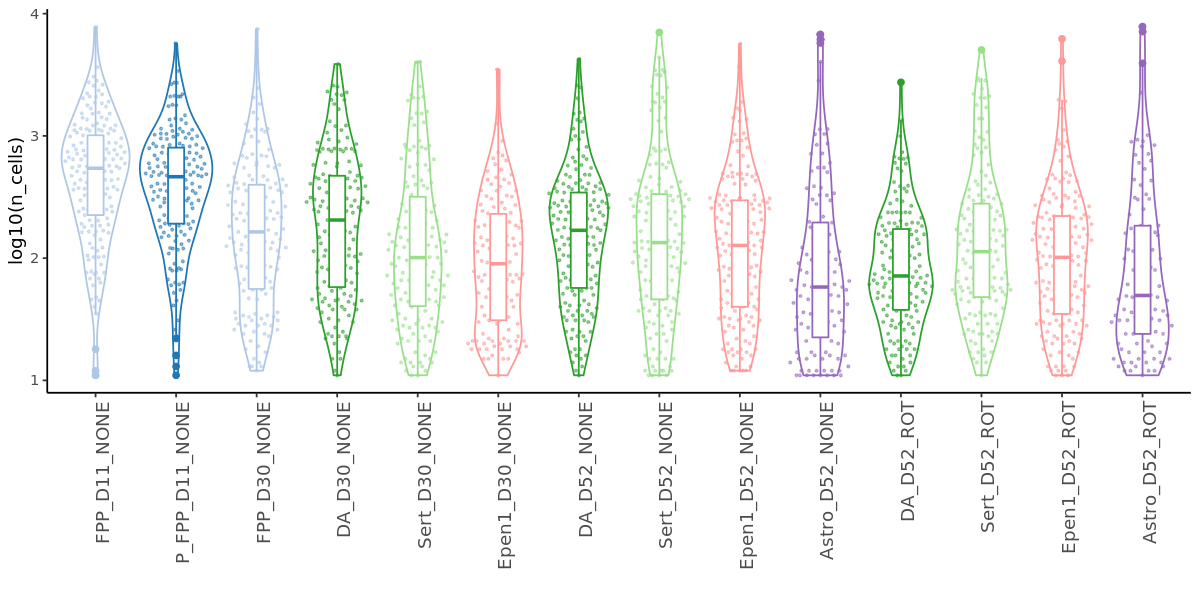

In [8]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(df_to_plot, aes(x = factor(condition, levels = c('FPP_D11_NONE','P_FPP_D11_NONE',
                                 'FPP_D30_NONE','DA_D30_NONE','Sert_D30_NONE','Epen1_D30_NONE',
                                 'DA_D52_NONE','Sert_D52_NONE','Epen1_D52_NONE','Astro_D52_NONE',
                                 'DA_D52_ROT','Sert_D52_ROT','Epen1_D52_ROT','Astro_D52_ROT')), 
                    y = log10(n_cells), 
                    colour = factor(celltype, levels = c('FPP','P_FPP','DA','Sert','Epen1','Astro')))) + 
       geom_violin() + geom_quasirandom(alpha = 0.5, size = 0.5) +
    geom_boxplot(width = 0.2) + scale_colour_manual(values = c(col_FPP,col_P_FPP,
                            col_DA,col_Sert,col_Epen1,col_Astro)) + theme_classic() + xlab("") +
    theme(legend.position = 'none',axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 

In [9]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"
pdf(paste0(fig_dir,"Ext_Fig_7a.pdf"), width=10, height=5)
ggplot(df_to_plot, aes(x = factor(condition, levels = c('FPP_D11_NONE','P_FPP_D11_NONE',
                                 'FPP_D30_NONE','DA_D30_NONE','Sert_D30_NONE','Epen1_D30_NONE',
                                 'DA_D52_NONE','Sert_D52_NONE','Epen1_D52_NONE','Astro_D52_NONE',
                                 'DA_D52_ROT','Sert_D52_ROT','Epen1_D52_ROT','Astro_D52_ROT')), 
                    y = log10(n_cells), 
                    colour = factor(celltype, levels = c('FPP','P_FPP','DA','Sert','Epen1','Astro')))) + 
       geom_violin() + geom_quasirandom(alpha = 0.5, size = 0.5) +
    geom_boxplot(width = 0.2) + scale_colour_manual(values = c(col_FPP,col_P_FPP,
                            col_DA,col_Sert,col_Epen1,col_Astro)) + theme_classic() + xlab("") +
    theme(legend.position = 'none',axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 
dev.off()

png 
  2